# Задача 7.2

In [2]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Рассмотрим схему испытаний Бернулли с вероятностью успеха p. Априорное распределение - $Beta(\alpha, \beta)$. Построим графики плотности априорного распределения для разных параметров $\alpha$ и $\beta$:

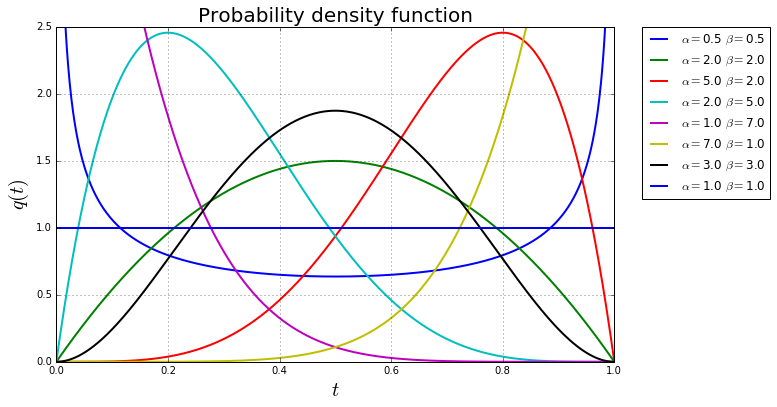

In [3]:
x = np.linspace(0, 1, 1000)

alpha = np.array([0.5, 2, 5, 2, 1, 7, 3, 1])
beta = np.array([0.5, 2, 2, 5, 7, 1, 3, 1])

plt.figure(figsize=(10, 6))

for i in range(8):
    plt.plot(x, sps.beta.pdf(x, a=alpha[i], b=beta[i]), linewidth = 2, label = r'$\alpha = $' + str(alpha[i]) + 
             r' $\beta = $' + str(beta[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0, 1))
plt.ylim((0, 2.5))
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$q(t)$', fontsize = 20)
plt.title('Probability density function', fontsize = 20)
plt.grid() 
plt.show()

Из графиков видно, что при $\alpha = \beta > 1$, плотность распределения максимальна при $t = 0.5$. Если $\alpha < \beta$, то плотность максимальна при некотором значении $t < 0.5$, причем это значение уменьшается при увеличении разницы между $\alpha$ и $\beta$. Если $\alpha > \beta$, то максимум при $t > 0.5$. Так как априорное распределение - распределение параметра $\theta$, то плотность должна быть максимальна при наиболее вероятных значениях $\theta$. Если наиболее вероятны значения в окрестности 0.5, то параметры априорного распределения должны быть равны и больше 1. Если наименее вероятны значения в окрестности 0.5, то $\alpha = \beta < 1$. Наиболее вероятны значения в окрестности 1 - $\alpha > \beta$.

Байесовская оценка для распределения Бернулли, если априорное распределение - $Beta(\alpha, \beta)$, - $\frac{\alpha + \sum_{i=1}^n X_i}{n + \alpha + \beta}$

In [4]:
def bayesian_estimation(sample, alpha, beta):
    s = np.arange(1, sample.size + 1, 1)
    return (alpha + sample.cumsum()) / (s + alpha + beta)

Сгенерируем выборки для нескольких значений p:

In [12]:
n = 20
p = np.array([0.25, 0.5, 0.75])
sample = np.zeros((3, n))
for i in range(3):
    sample[i] = sps.bernoulli.rvs(p[i], size=n)

Оценка максимального правдоподобия для параметра $\theta$ - $\frac{\overline{X}}{2}$:

In [13]:
s = np.arange(1, n + 1, 1)
max_likelihood_est = np.zeros((3, n))
for i in range(3):
    max_likelihood_est[i] = sample[i].cumsum() / (2 * s)

Для каждого значения p построим графики зависимости абсолютных отклонений байесовских оценок с разными параметрами априорного распределения и оценки максимального правдоподобия от истинного значения $\theta$ от n. 

In [14]:
alpha_1 = np.array([2, 2, 5])
beta_1 = np.array([2, 5, 2])

In [15]:
def draw_plot(sample, max_likelihood_est, p, alpha_1, beta_1):
    plt.figure(figsize=(10, 6))
    plt.plot(s, abs(max_likelihood_est - p), color = 'orange', linewidth=2, label=r'$\frac{\overline{X}}{2}$')
    for j in range(alpha_1.size):
        plt.plot(s, abs(bayesian_estimation(sample, alpha_1[j], beta_1[j]) - p), linewidth=2, 
                 label=r'$\alpha$ =' + str(alpha_1[j]) + r', $\beta$ = ' + str(beta_1[j]))
    plt.legend()
    plt.xlabel('n', fontsize = 20)
    plt.title('p = ' + str(p), fontsize = 20)
    plt.grid() 

(0, 0.4)

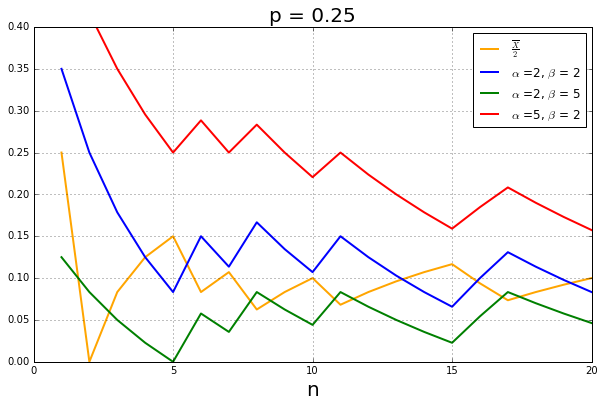

In [16]:
draw_plot(sample[0], max_likelihood_est[0], p[0], alpha_1, beta_1)
plt.xlim(0, n)
plt.ylim(0, 0.4)

(0, 0.45)

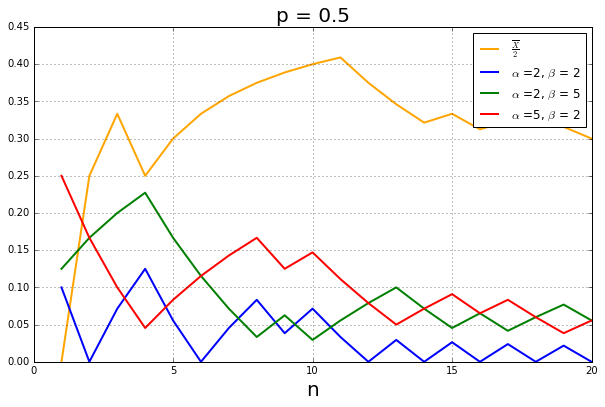

In [23]:
draw_plot(sample[1], max_likelihood_est[1], p[1], alpha_1, beta_1)
plt.xlim(0, n)
plt.ylim(0, 0.45)

(0, 0.7)

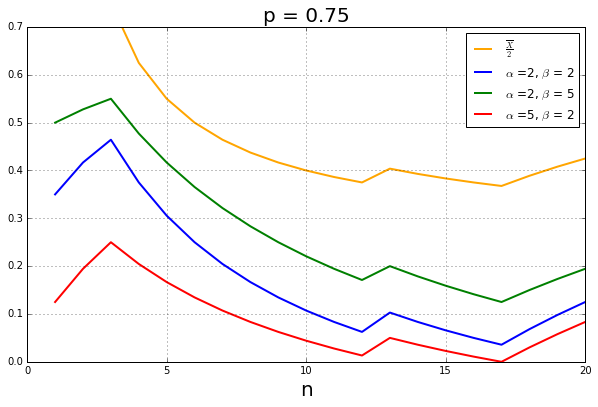

In [22]:
draw_plot(sample[2], max_likelihood_est[2], p[2], alpha_1, beta_1)
plt.xlim(0, n)
plt.ylim(0, 0.7)

Из графиков видно, что при $p = 0.25$ наилучшая оценка - байесовская с параметрами $\alpha = 2, \beta = 5$, при $p = 0.5$ - с параметрами $\alpha = 2, \beta = 2$, при $p = 0.75$ - $\alpha = 5, \beta = 2$, что согласуется с наилучшим выбором априорного распределения в зависимости от p. Заметим, что для всех p байесовские оценки лучше оценки максимального правдоподобия. Это связано с тем, что значения n малы, а оценка максимального правдоподобия корректна при $n \to \infty$, в отличие от байесовских оценок, которые точны при $n \geq 0$.